# Titanic Competition

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). 

## Introduction

In [34]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

train_filepath = './titanic/train.csv'
test_filepath = './titanic/test.csv'

titanic_data = pd.read_csv(train_filepath, index_col='PassengerId')
test_data = pd.read_csv(test_filepath, index_col='PassengerId')

print('>>> Sucessfully imported all libraries and dataset')

>>> Sucessfully imported all libraries and dataset


## I. Exploratory Data Analysis

In [35]:
titanic_data.sample(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
40,1,3,"Nicola-Yarred, Miss. Jamila",female,14.0,1,0,2651,11.2417,NaN,C
143,1,3,"Hakkarainen, Mrs. Pekka Pietari (Elin Matilda ...",female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S
590,0,3,"Murdlin, Mr. Joseph",male,NaN,0,0,A./5. 3235,8.0500,NaN,S
511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.7500,NaN,Q
564,0,3,"Simmons, Mr. John",male,NaN,0,0,SOTON/OQ 392082,8.0500,NaN,S
876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
414,0,2,"Cunningham, Mr. Alfred Fleming",male,NaN,0,0,239853,0.0000,NaN,S
632,0,3,"Lundahl, Mr. Johan Svensson",male,51.0,0,0,347743,7.0542,NaN,S
548,1,2,"Padro y Manent, Mr. Julian",male,NaN,0,0,SC/PARIS 2146,13.8625,NaN,C


In [36]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


There are 891 rows and 11 columns. The target column we want to predict is Survived (Classification problem).

Data dictionnary:
* Survived: survival (1=yes, 0=no)
* Pclass: ticket class (1=upper, 2=middle, 3=lower)
* Name: name
* Sex: sex
* Age: age in years
* SibSp: number of siblings / spouses aboard the Titcanic
* Parch: number of parents / children aboard the Titanic
* Ticket: ticket number
* Fare: passenger fare
* Cabin: cabun number
* Embarked: port of embarkation

### 1. Numerical columns

In [10]:
num_cols = titanic_data.select_dtypes(exclude=['object']).columns

num_cols

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [11]:
num_data = titanic_data[num_cols]

num_data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
num_data.shape

(891, 6)

There are 6 numerical columns including the target column Survived. This is a binary classification problem.

#### Count plots

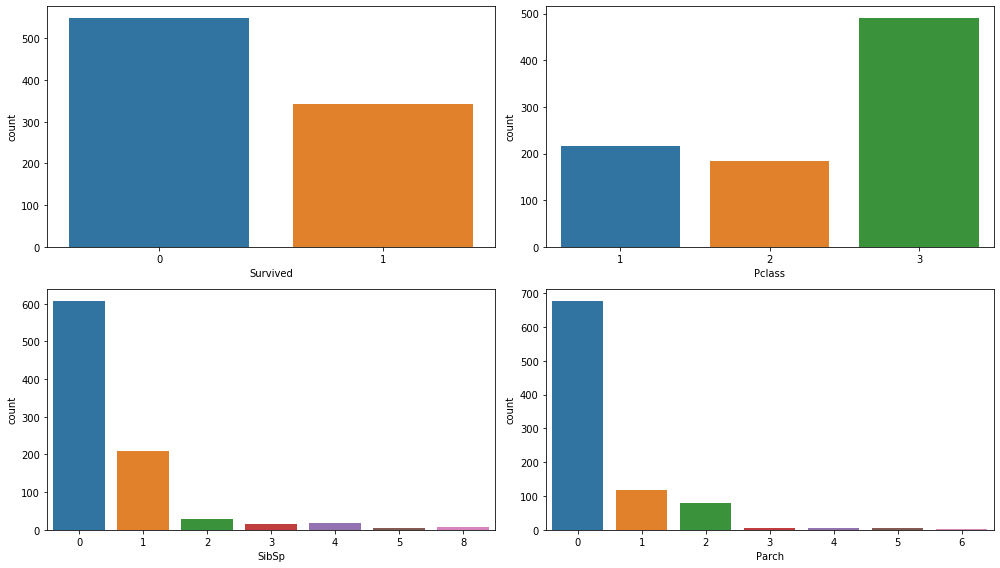

In [13]:
num_plot = ['Survived', 'Pclass', 'SibSp', 'Parch']

fig = plt.figure(figsize=(14,8))

for i in range(num_data[num_plot].shape[1]):
    fig.add_subplot(2,2,i+1)
    sns.countplot(num_data[num_plot].iloc[:,i].dropna())
    
plt.tight_layout()

In [14]:
num_data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

The target columns a bit unbalanced. There is a higher proportion of people who did not survive (61%) than people who survived (39%).

#### Bar plots

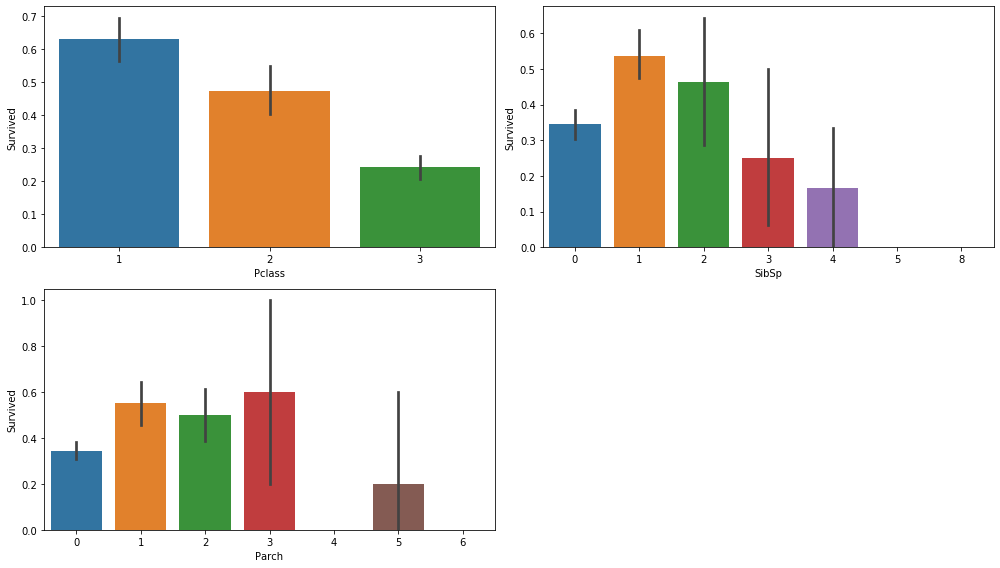

In [15]:
num_plot = ['Pclass', 'SibSp', 'Parch']

fig = plt.figure(figsize=(14,8))

for i in range(num_data[num_plot].shape[1]):
    fig.add_subplot(2,2,i+1)
    sns.barplot(x=num_data[num_plot].iloc[:,i].dropna(), y=num_data.Survived)
    
plt.tight_layout()

#### Box plots

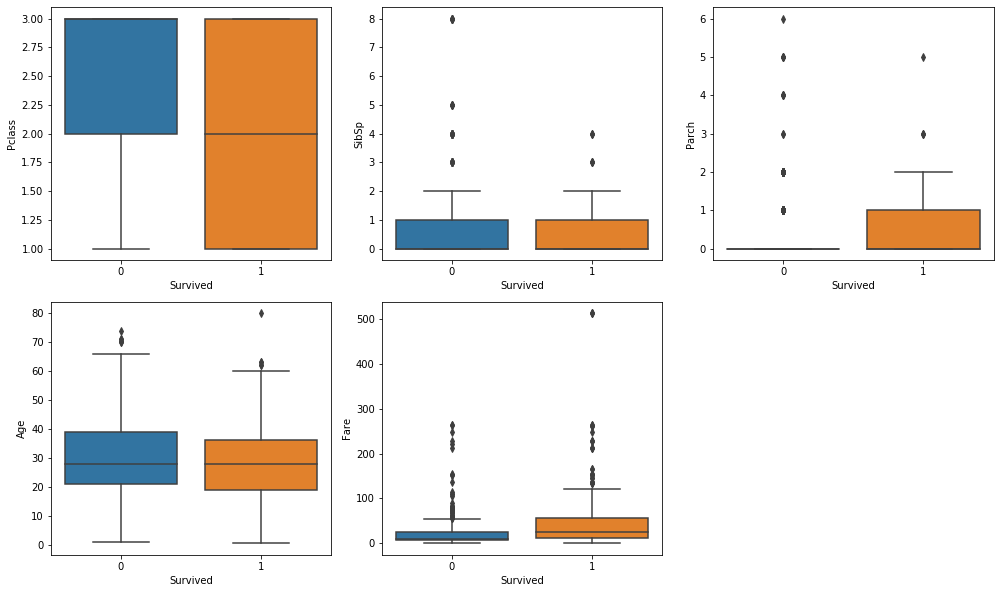

In [16]:
num_plot = ['Pclass', 'SibSp', 'Parch', 'Age', 'Fare']

fig = plt.figure(figsize=(14,12))

for i in range(num_data[num_plot].shape[1]):
    fig.add_subplot(3,3,i+1)
    sns.boxplot(y=num_data[num_plot].iloc[:,i].dropna(), x='Survived', data=num_data)
    
plt.tight_layout()

#### Pair plots

C:\Users\laure\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\laure\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\laure\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\laure\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


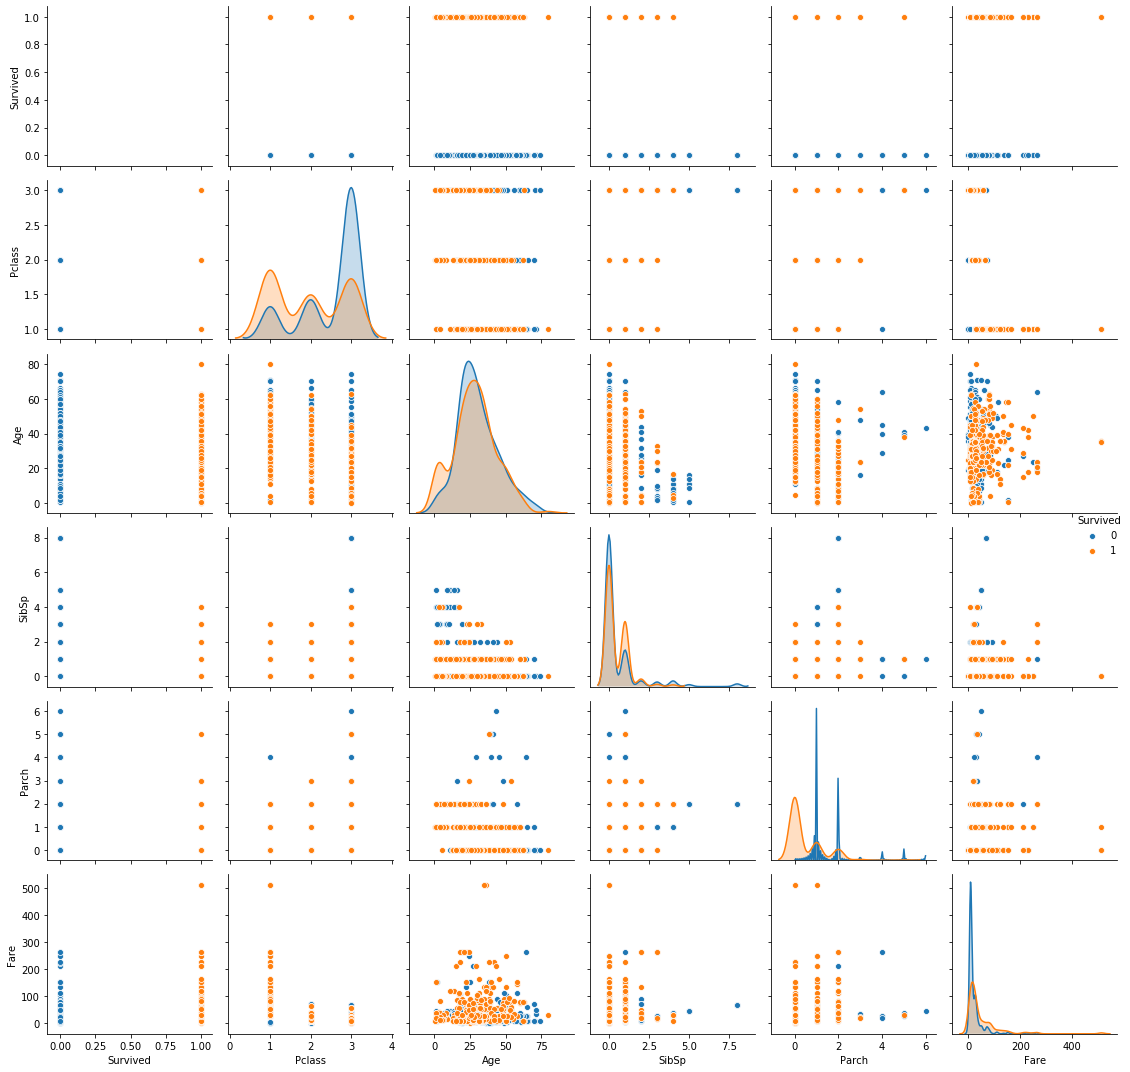

In [17]:
sns.pairplot(num_data, hue='Survived')
    
plt.tight_layout()

#### Correlation plot

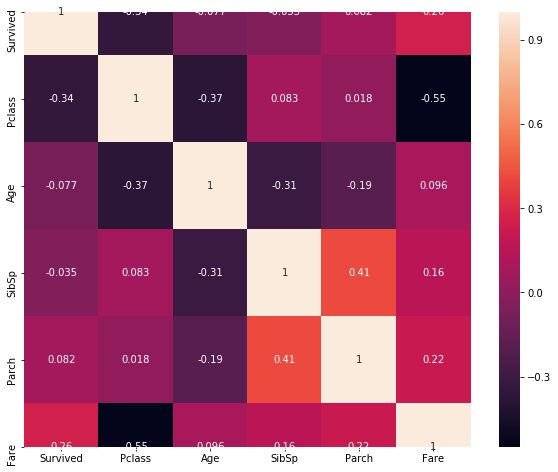

In [18]:
corr = titanic_data.corr()

fig = plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True)

In [19]:
corr['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Name: Survived, dtype: float64

### 2. Categorical columns

In [21]:
cat_cols = titanic_data.select_dtypes(include=['object']).columns

cat_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [22]:
cat_data = titanic_data[cat_cols]

cat_data.describe()

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Boulos, Miss. Nourelain",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [23]:
cat_data.shape

(891, 5)

There are 5 categorical columns

#### Count plots

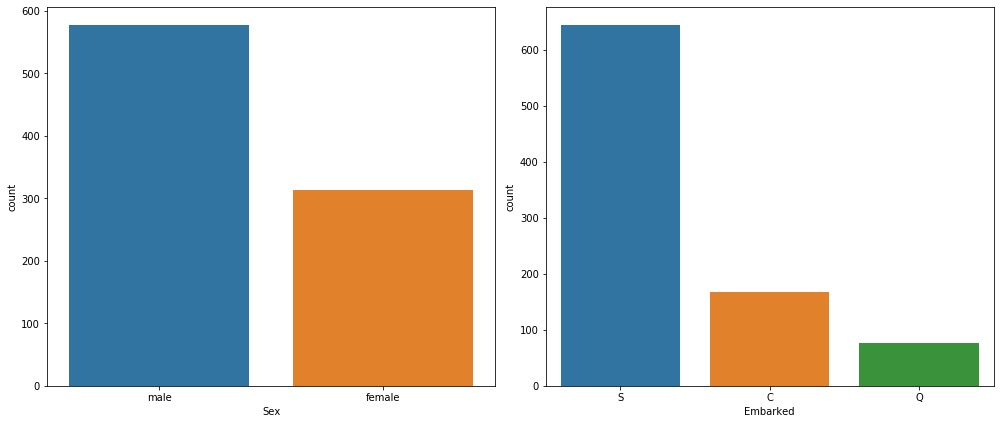

In [24]:
cat_plot = ['Sex', 'Embarked']

fig = plt.figure(figsize=(14,6))

for i in range(cat_data[cat_plot].shape[1]):
    fig.add_subplot(1,2,i+1)
    sns.countplot(cat_data[cat_plot].iloc[:,i].dropna())
    
plt.tight_layout()

#### Bar plots

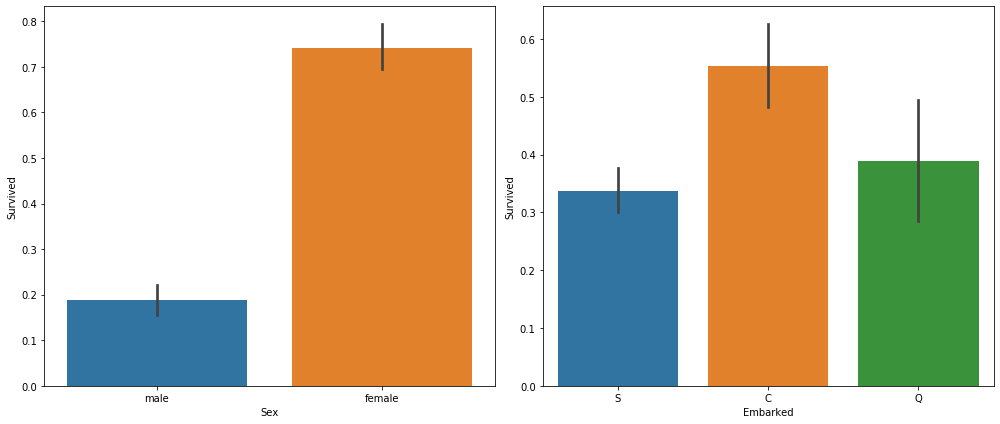

In [25]:
fig = plt.figure(figsize=(14,6))

for i in range(cat_data[cat_plot].shape[1]):
    fig.add_subplot(1,2,i+1)
    sns.barplot(x=cat_data[cat_plot].iloc[:,i].dropna(), y=num_data.Survived, data=cat_data[cat_plot])
    
plt.tight_layout()

We can see that more than 70% of the female population survived. So if we predicted that all female survived, we would have a model with at least 70% accuracy.

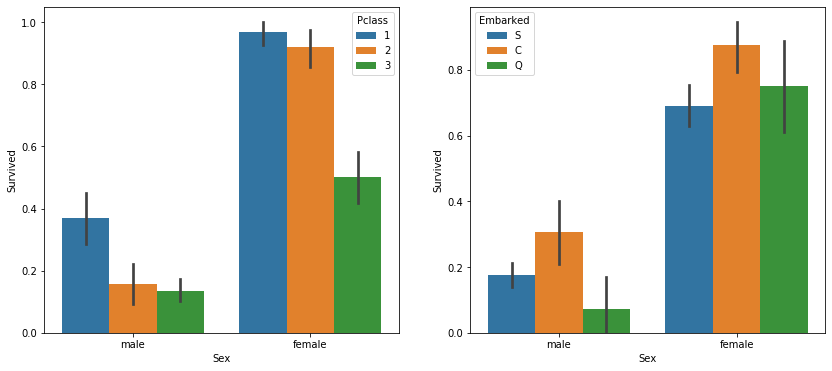

In [26]:
fig = plt.figure(figsize=(14,6))

plt.subplot(121)
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=titanic_data)

plt.subplot(122)
sns.barplot(x='Sex', y='Survived', hue='Embarked', data=titanic_data)

Female who bought middle or upper class ticket have more than 90% survival chance while male with middle or lower ticket only have 20% survival rate.

### 3. Missing values

In [82]:
titanic_data.isnull().sum().sort_values(ascending=False).head()

Cabin       687
Age         177
Embarked      2
Fare          0
Ticket        0
dtype: int64

The Cabin column has a lot of missing values (more than 2/3 of total data), we should consider dropping it.

In [83]:
test_data.isnull().sum().sort_values(ascending=False).head()

Cabin       327
Age          86
Fare          1
Embarked      0
Ticket        0
dtype: int64

## II. Data Cleaning and Preprocessing

In [28]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

### 1. Dealing with missing values

In [119]:
# Create copy of dataset before doing operations on it
data_copy = titanic_data.copy()
y = data_copy.Survived

data_copy['Embarked'] = data_copy['Embarked'].fillna(data_copy['Embarked'].mode()[0])
data_copy['Age'] = data_copy['Age'].fillna(data_copy['Age'].median())

#Checking for remaining missing values
data_copy.isnull().sum().sort_values(ascending=False)

Cabin       687
Embarked      0
Fare          0
Ticket        0
Parch         0
SibSp         0
Age           0
Sex           0
Name          0
Pclass        0
Survived      0
dtype: int64

In [120]:
# Doing the same for the test set
X_test = test_data.copy()

# Dealing with missing values
X_test['Age'] = X_test['Age'].fillna(X_test['Age'].median())
X_test['Fare'] = X_test['Fare'].fillna(X_test['Fare'].median())

#Checking for remaining missing values
X_test.isnull().sum().sort_values(ascending=False)

Cabin       327
Embarked      0
Fare          0
Ticket        0
Parch         0
SibSp         0
Age           0
Sex           0
Name          0
Pclass        0
dtype: int64

## III. Feature Selection and Engineering

In [121]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

### 1. Dropping features

In [122]:
# The name and ticket number should not have a link with survival so we can drop these columns
cols_drop = ['Name', 'Ticket', 'Cabin']
X_drop = data_copy.drop(cols_drop, axis=1)

X_drop.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
28,0,1,male,19.0,3,2,263.0000,S
584,0,1,male,36.0,0,0,40.1250,C
10,1,2,female,14.0,1,0,30.0708,C
109,0,3,male,38.0,0,0,7.8958,S
183,0,3,male,9.0,4,2,31.3875,S


In [123]:
# Doing the same for the test set
X_test = X_test.drop(cols_drop, axis=1)

X_test.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1273,3,male,26.0,0,0,7.8792,Q
1135,3,male,27.0,0,0,7.8875,S
972,3,male,6.0,1,1,15.2458,C
903,1,male,46.0,0,0,26.0000,S
1169,2,male,40.0,1,0,26.0000,S


### 2. Creating new features

New features:
* We can use SibSp and Parch to estimate the family size of a passenger as well as if he was travelling alone on the boat.
* We can try splitting the age and fare columns into bins.
* The name column can be used to extract titles which can influence the survival outcome.

In [124]:
# Size of family
X_drop['FamilySize'] = X_drop['SibSp'] + X_drop['Parch'] + 1

# Alone
X_drop['IsAlone'] = 1 #initialize to yes/1 if alone
X_drop['IsAlone'].loc[X_drop['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

# Fare bin
X_drop['FareBin'] = pd.qcut(X_drop['Fare'], 4)

# Age bin
X_drop['AgeBin'] = pd.cut(X_drop['Age'].astype(int), 5)

# Title
X_drop['Title'] = data_copy['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

X_plus = X_drop
X_plus.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,FareBin,AgeBin,Title
PassengerId,,,,,,,,,,,,,
398,0,2,male,46.0,0,0,26.0000,S,1,1,"(14.454, 31.0]","(32.0, 48.0]",Mr
535,0,3,female,30.0,0,0,8.6625,S,1,1,"(7.91, 14.454]","(16.0, 32.0]",Miss
275,1,3,female,28.0,0,0,7.7500,Q,1,1,"(-0.001, 7.91]","(16.0, 32.0]",Miss
764,1,1,female,36.0,1,2,120.0000,S,4,0,"(31.0, 512.329]","(32.0, 48.0]",Mrs
839,1,3,male,32.0,0,0,56.4958,S,1,1,"(31.0, 512.329]","(16.0, 32.0]",Mr


In [125]:
X_drop['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Jonkheer          1
Sir               1
Don               1
Mme               1
Ms                1
Capt              1
the Countess      1
Lady              1
Name: Title, dtype: int64

We can regroup the rare titles into a single category.

In [126]:
title_names = (X_drop['Title'].value_counts() < 10)
X_drop['Title'] = X_drop['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)
print(X_drop['Title'].value_counts())

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64


In [127]:
# Doing the same for the test set
X_test['FamilySize'] = X_test['SibSp'] + X_test['Parch'] + 1

X_test['FareBin'] = pd.qcut(X_test['Fare'], 4)

X_test['AgeBin'] = pd.cut(X_test['Age'].astype(int), 5)

X_test['IsAlone'] = 1 #initialize to yes/1 if alone
X_test['IsAlone'].loc[X_test['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

X_test['Title'] = test_data['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
title_names = (X_test['Title'].value_counts() < 10)
X_test['Title'] = X_test['Title'].apply(lambda x: 'Misc' if title_names.loc[x] == True else x)

print(X_test['Title'].value_counts())

Mr        240
Miss       78
Mrs        72
Master     21
Misc        7
Name: Title, dtype: int64


### 3. Encoding categorical features

In [128]:
cols_enc = ['FareBin', 'AgeBin', 'Title', 'Sex']

label_encoder = LabelEncoder()
for col in cols_enc:
    X_plus[col] = label_encoder.fit_transform(X_plus[col])

X_enc = pd.get_dummies(X_plus)

X_enc.sample(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,IsAlone,FareBin,AgeBin,Title,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,
684,0,3,1,14.0,5,2,46.9000,8,0,3,0,3,0,0,1
867,1,2,0,27.0,1,0,13.8583,2,0,1,1,2,1,0,0
162,1,2,0,40.0,0,0,15.7500,1,1,2,2,4,0,0,1
671,1,2,0,40.0,1,1,39.0000,3,0,3,2,4,0,0,1
515,0,3,1,24.0,0,0,7.4958,1,1,0,1,3,0,0,1


In [129]:
# Doing the same for the test set
label_encoder = LabelEncoder()
for col in cols_enc:
    X_test[col] = label_encoder.fit_transform(X_test[col])
X_test = pd.get_dummies(X_test)

X_test.sample(5)

,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,FareBin,AgeBin,IsAlone,Title,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,
1045,3,0,36.0,0,2,12.1833,3,1,2,0,4,0,0,1
1159,3,1,27.0,0,0,7.5500,1,0,1,1,3,0,0,1
1007,3,1,18.0,1,0,14.4542,2,1,1,0,3,1,0,0
1015,3,1,28.0,0,0,7.2500,1,0,1,1,3,0,0,1
1051,3,0,26.0,0,2,13.7750,3,1,1,0,4,0,0,1


### 4. Selecting the best features

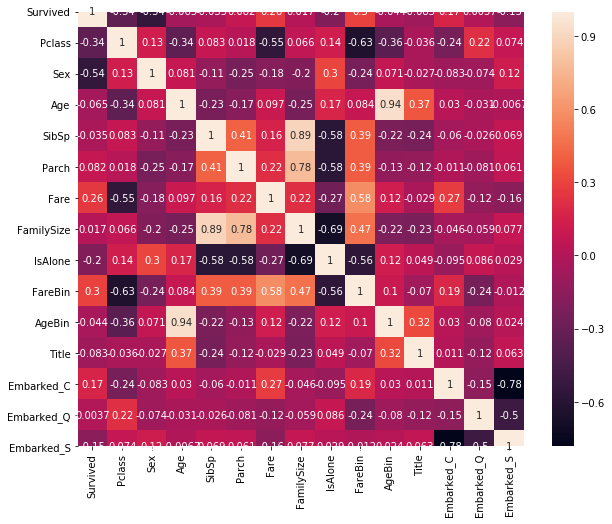

In [130]:
X_enc['Survived'] = y
X_corr = X_enc.corr()

fig = plt.figure(figsize=(10,8))
sns.heatmap(X_corr, annot=True)

In [131]:
X_corr['Survived'].sort_values(ascending=False)

Survived      1.000000
FareBin       0.299357
Fare          0.257307
Embarked_C    0.168240
Parch         0.081629
FamilySize    0.016639
Embarked_Q    0.003650
SibSp        -0.035322
AgeBin       -0.044492
Age          -0.064910
Title        -0.083292
Embarked_S   -0.149683
IsAlone      -0.203367
Pclass       -0.338481
Sex          -0.543351
Name: Survived, dtype: float64

In [144]:
# Dropping non relevant or redundant features
cols_drop_2 = ['Age', 'FamilySize', 'Fare', 'Survived']

X = X_enc.drop(cols_drop_2, axis=1)

X.sample(5)

,Pclass,Sex,SibSp,Parch,IsAlone,FareBin,AgeBin,Title,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
410,3,0,3,1,0,2,1,2,0,0,1
109,3,1,0,0,1,0,2,3,0,0,1
691,1,1,1,0,0,3,1,3,0,0,1
20,3,0,0,0,1,0,1,4,1,0,0
44,2,0,1,2,0,3,0,2,1,0,0


In [134]:
# Doing the same for the test set
X_test = X_test.drop(['Age', 'FamilySize', 'Fare'], axis=1) 

X_test.sample(5)

,Pclass,Sex,SibSp,Parch,FareBin,AgeBin,IsAlone,Title,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,
975,3,1,0,0,0,1,1,3,0,0,1
993,2,1,1,0,2,1,0,3,0,0,1
1018,3,1,0,0,0,1,1,3,0,0,1
1073,1,1,1,1,3,2,0,3,1,0,0
1230,2,1,0,0,3,1,1,3,0,0,1


### 5. Scaling the features

In [146]:
std_scaler = StandardScaler()

X = pd.DataFrame(std_scaler.fit_transform(X))

X.sample(5)

,0,1,2,3,4,5,6,7,8,9,10
529,-0.369365,0.737695,1.340132,0.767630,-1.231645,-0.444905,-0.355405,0.289392,-0.482043,-0.307562,0.615838
192,0.827377,-1.355574,0.432793,-0.473674,-1.231645,-1.339737,-0.355405,-0.826834,-0.482043,-0.307562,0.615838
77,0.827377,0.737695,-0.474545,-0.473674,0.811922,-0.444905,-0.355405,0.289392,-0.482043,-0.307562,0.615838
93,0.827377,0.737695,0.432793,2.008933,-1.231645,0.449927,-0.355405,0.289392,-0.482043,-0.307562,0.615838
693,0.827377,0.737695,-0.474545,-0.473674,0.811922,-1.339737,-0.355405,0.289392,2.074505,-0.307562,-1.623803


In [135]:
# Doing the same for the test set
X_test = pd.DataFrame(std_scaler.transform(X_test))

X_test.sample(5)

,0,1,2,3,4,5,6,7,8,9,10
377,-0.369365,0.737695,-0.474545,-0.473674,0.811922,-0.444905,-0.355405,0.289392,-0.482043,-0.307562,0.615838
407,-1.566107,0.737695,0.432793,0.767630,4.899057,1.344758,-1.587566,0.289392,2.074505,-0.307562,-1.623803
346,-0.369365,0.737695,-0.474545,-0.473674,0.811922,-0.444905,-0.355405,0.289392,-0.482043,-0.307562,0.615838
304,0.827377,-1.355574,-0.474545,-0.473674,-1.231645,-0.444905,-0.355405,-0.826834,-0.482043,3.251373,-1.623803
295,0.827377,0.737695,-0.474545,-0.473674,-1.231645,-0.444905,-0.355405,0.289392,-0.482043,-0.307562,0.615838


## IV Model Selection

In [149]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

### 1. Testing different models

In [147]:
accuracy_comparison = pd.Series()
accuracy_comparison.index.name = 'Model'

# Logistic Regression
logistic_model = LogisticRegression(solver='liblinear', penalty='l2', C=20)
logistic_accuracy = cross_val_score(logistic_model, X, y, cv=5, scoring='accuracy')

accuracy_comparison['Logistic Regression'] = logistic_accuracy.mean()

# Stochastic Gradient Descent Classifier
sgd_model = SGDClassifier()
sgd_accuracy = cross_val_score(sgd_model, X, y, cv=5, scoring='accuracy')

accuracy_comparison['SGD Classifier'] = sgd_accuracy.mean()

# Kernel Support Vector Machine (SVM)
ksvm_model = SVC(kernel='rbf', C=350, gamma=0.0009, degree=1)
ksvm_accuracy = cross_val_score(ksvm_model, X, y, cv=5, scoring='accuracy')

accuracy_comparison['Kernel SVM'] = ksvm_accuracy.mean()

# Random Forest
rf_model = RandomForestClassifier(n_estimators=450, min_samples_split=4,
                                  min_samples_leaf=3, max_depth=35)
rf_accuracy = cross_val_score(rf_model, X, y, cv=5, scoring='accuracy')

accuracy_comparison['Random Forest'] = rf_accuracy.mean()

# XGBClassifier
xgb_model = XGBClassifier(learning_rate=0.05, max_depth=3, n_estimators=300)
xgb_accuracy = cross_val_score(xgb_model, X, y, cv=5, scoring='accuracy')

accuracy_comparison['XGB Classifier'] = xgb_accuracy.mean()

# KNN
knn_model = KNeighborsClassifier(weights='uniform', n_neighbors=6)
knn_accuracy = cross_val_score(knn_model, X, y, cv=5, scoring='accuracy')

accuracy_comparison['KNN Classifier'] = knn_accuracy.mean()

print('Mean Accuracy for Different Models: ')
print(accuracy_comparison.sort_values(ascending=False))

Mean Accuracy for Different Models: 
Model
Kernel SVM             0.822684
KNN Classifier         0.820505
XGB Classifier         0.819426
Random Forest          0.817172
Logistic Regression    0.795780
SGD Classifier         0.789032
dtype: float64


#### Artificial Neural Networks

In [141]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import Model, backend as K
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

print('TensorFlow version:', tf.__version__)
print('Keras version:', keras.__version__)

TensorFlow version: 2.2.0
Keras version: 2.3.0-tf


In [395]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2)


early_stopping_cb = EarlyStopping(patience=10, restore_best_weights=True)

ann_model = Sequential ([
    Dense(200, activation='relu', kernel_initializer='he_uniform',
          input_shape=X_train.shape[1:]),
    Dropout(rate=0.1),
    Dense(150, activation='relu', kernel_initializer='he_uniform'),
    Dropout(rate=0.1),
    Dense(100, activation='relu', kernel_initializer='he_uniform'),
    Dropout(rate=0.1),
    Dense(100, activation='relu', kernel_initializer='he_uniform'),
    Dense(1, activation='sigmoid')
])

ann_model.compile(loss='binary_crossentropy', optimizer='adam', metrics='accuracy')

history = ann_model.fit(X_train, y_train, epochs=100, 
                        validation_data=(X_valid, y_valid), 
                        callbacks=[early_stopping_cb])

ann_model.save('binary_classification_model.h5')

Epoch 1/100
23/23 [==============================] - 0s 5ms/step - loss: 0.6254 - accuracy: 0.6559 - val_loss: 0.4171 - val_accuracy: 0.8101
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4540 - accuracy: 0.8006 - val_loss: 0.3748 - val_accuracy: 0.8492
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4439 - accuracy: 0.8090 - val_loss: 0.3728 - val_accuracy: 0.8380
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4368 - accuracy: 0.8104 - val_loss: 0.3613 - val_accuracy: 0.8603
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4248 - accuracy: 0.8230 - val_loss: 0.3620 - val_accuracy: 0.8603
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4334 - accuracy: 0.8174 - val_loss: 0.3516 - val_accuracy: 0.8492
Epoch 7/100
23/23 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.8118 - val_loss: 0.3726 - val_accuracy: 0.8603
Epoch 8/100
2

Text(0.5, 1.0, 'Learning curves')

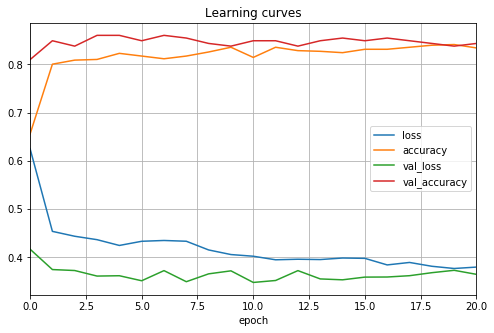

In [397]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.xlabel('epoch')
plt.title('Learning curves')

### 2. Hyperparameter Tuning

#### Random Forest

In [89]:
# # Random Forest - Randomized Search
# rf_param_distributions ={
#     'n_estimators': [100,200,300,400,500,600,700],
#     'max_depth': [10,20,30,40,50],
#     'min_samples_leaf': [1,2,3,4,5],
#     'min_samples_split': [2,3,4,5,6]
# }

# rf_model = RandomForestClassifier()
# rf_random = RandomizedSearchCV(estimator=rf_model, param_distributions=rf_param_distributions,
#                                n_iter=100, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
# rf_random.fit(X,y)

# print('Best params:', rf_random.best_params_)
# print('Best score:', rf_random.best_score_)

In [90]:
# # Random Forest - Grid Search
# rf_param_grid ={
#     'n_estimators': [450,500,550],
#     'max_depth': [35,40,45],
#     'min_samples_leaf': [1,2,3],
#     'min_samples_split': [4,5,6]
# }

# rf_model = RandomForestClassifier()
# rf_grid = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, 
#                        scoring='accuracy', verbose=2, n_jobs=-1)
# rf_grid.fit(X,y)

# print('Best params:', rf_grid.best_params_)
# print('Best score:', rf_grid.best_score_)

#### SVM

In [91]:
# # SVM - Randomized Search
# svm_param_distributions ={
#     'C': [0.1,1,10,100],
#     'gamma': [1,0.1,0.01,0.001],
#     'degree': [1,2,3],
#     'kernel': ['rbf'],
# }

# svm_model = SVC()
# svm_random = RandomizedSearchCV(estimator=svm_model, param_distributions=svm_param_distributions,
#                                n_iter=100, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
# svm_random.fit(X,y)

# print('Best params:', svm_random.best_params_)
# print('Best score:', svm_random.best_score_)

In [92]:
# # SVM - Grid Search
# svm_param_grid ={
#     'C': [300,350,400],
#     'gamma': [0.0008,0.0009,0.001],
#     'degree': [1,2],
#     'kernel': ['rbf'],
# }

# svm_model = SVC()
# svm_grid = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, cv=5,
#                         scoring='accuracy', verbose=2, n_jobs=-1)
# svm_grid.fit(X,y)

# print('Best params:', svm_grid.best_params_)
# print('Best score:', svm_grid.best_score_)

#### Logistic Regression

In [93]:
# # Logistic - Randomized Search
# logistic_param_distributions ={
#     'penalty': ['l1','l2'],
#     'C': [0.1,1,10,100],
#     'solver': ['liblinear']
# }

# logistic_model = LogisticRegression()
# logistic_random = RandomizedSearchCV(estimator=logistic_model, param_distributions=logistic_param_distributions,
#                                n_iter=100, cv=5, scoring='accuracy', verbose=2,
#                                random_state=42, n_jobs=-1)
# logistic_random.fit(X,y)

# print('Best params:', logistic_random.best_params_)
# print('Best score:', logistic_random.best_score_)

In [94]:
# # Logistic - Randomized Search
# logistic_param_grid ={
#     'penalty': ['l1','l2'],
#     'C': [15,20,25],
#     'solver': ['liblinear']
# }

# logistic_model = LogisticRegression()
# logistic_grid = GridSearchCV(estimator=logistic_model, param_grid=logistic_param_grid,
#                              cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
# logistic_grid.fit(X,y)

# print('Best params:', logistic_grid.best_params_)
# print('Best score:', logistic_grid.best_score_)

#### XGB Classifier

In [95]:
# # XGB Classifier - Randomized Search
# xgb_param_distributions ={
#     'learning_rate': [0.001,0.1,1],
#     'n_estimators': [100,200,300,400,500,600,700,800],
#     'max_depth': [2,3,4,5,6]
# }

# xgb_model = XGBClassifier()
# xgb_random = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_param_distributions,
#                                n_iter=100, cv=5, scoring='accuracy', verbose=2,
#                                random_state=42, n_jobs=-1)
# xgb_random.fit(X,y)

# print('Best params:', xgb_random.best_params_)
# print('Best score:', xgb_random.best_score_)

In [101]:
# # XGB Classifier - Grid Search
# xgb_param_grid ={
#     'learning_rate': [0.005,0.01,0.05],
#     'n_estimators': [300,400,500],
#     'max_depth': [2,3,4]
# }

# xgb_model = XGBClassifier()
# xgb_grid = GridSearchCV(estimator=xgb_model, param_grid=xgb_param_grid, 
#                               cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
# xgb_grid.fit(X,y)

# print('Best params:', xgb_grid.best_params_)
# print('Best score:', xgb_grid.best_score_)

#### KNeighbors Classifier

In [42]:
# # KNeighbors Classifier - Randomized Search
# knn_param_distributions ={
#     'n_neighbors': [i for i in range(1,30)],
#     'weights':['uniform','distance'],    
# }

# knn_model = KNeighborsClassifier()
# knn_random = RandomizedSearchCV(estimator=knn_model, param_distributions=knn_param_distributions,
#                                n_iter=100, cv=5, scoring='accuracy', verbose=2,
#                                random_state=42, n_jobs=-1)
# knn_random.fit(X,y)

# print('Best params:', knn_random.best_params_)
# print('Best score:', knn_random.best_score_)

### 3. Performance measures

In [50]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score

#### Confusion matrix

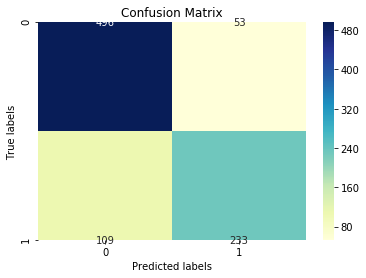

In [102]:
xgb_model = XGBClassifier(learning_rate=0.05, max_depth=3, n_estimators=300)
y_pred = cross_val_predict(xgb_model, X, y, cv=5)

xgb_confusion = confusion_matrix(y, y_pred)

def plot_confusion_matrix(matrix):
    ax = plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap='YlGnBu')

    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix') 
    ax.xaxis.set_ticklabels(['0', '1'])
    ax.yaxis.set_ticklabels(['0', '1']);
    
plot_confusion_matrix(xgb_confusion)

#### Precsion and Recall

In [103]:
print('XGBoost precision score:', precision_score(y_pred, y))
print('XGBoost recall score:', recall_score(y_pred, y))
print('XGBoost f1 score:', f1_score(y_pred, y))

XGBoost precision score: 0.6812865497076024
XGBoost recall score: 0.8146853146853147
XGBoost f1 score: 0.7420382165605095


This model is not very precise. When it claims that a person survived, it is correct only 68% of the time (precision). However it detects 81% of the surviving people (recall). 

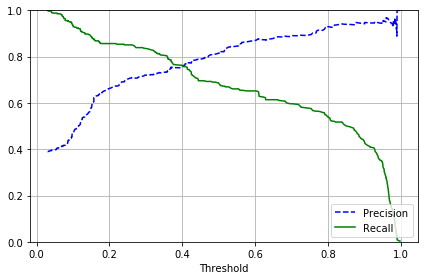

In [104]:
y_proba = cross_val_predict(xgb_model, X, y, cv=5, method='predict_proba')
y_pred = y_proba[:,1] # proba of positive class

precisions, recalls, thresholds = precision_recall_curve(y, y_pred)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    ax = plt.subplot()
    ax.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    ax.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    
    ax.set(ylim=[0,1])
    ax.grid(True)
    ax.set_xlabel('Threshold')
    ax.legend(loc='lower right')
    plt.tight_layout()
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)

#### ROC Curve

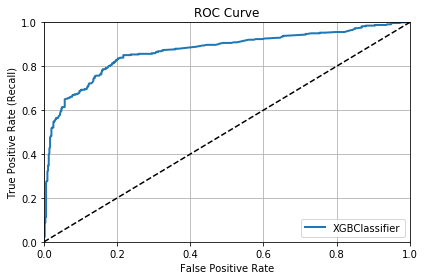

In [105]:
y_proba = cross_val_predict(xgb_model, X, y, cv=5, method='predict_proba')
y_pred = y_proba[:,1] # proba of positive class

fpr, tpr, thresholds = roc_curve(y, y_pred)

def plot_roc_curve(fpr, tpr, label=None):
    ax = plt.subplot()
    ax.plot(fpr, tpr, linewidth=2, label=label)
    ax.plot([0,1],[0,1],'k--')

    ax.set(xlim=[0,1],ylim=[0,1])
    ax.grid(True)
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate (Recall)')
    ax.legend(loc='lower right')
    plt.title('ROC Curve')
    plt.tight_layout()
    
plot_roc_curve(fpr, tpr, 'XGBClassifier')

In [106]:
xgb_roc_auc = roc_auc_score(y, y_pred)

print('XGBoost ROC AUC Score:', xgb_roc_auc)

XGBoost ROC AUC Score: 0.8705860735627776


## V. Submission

### 1. Create final model

In [419]:
# Create the final model
# final_model = XGBClassifier(learning_rate=0.05, max_depth=3, n_estimators=300)
final_model = load_model('binary_classification_model.h5')

# Fitting the final model usin all the data
# final_model.fit(X, y)
# final_model.fit(X, y, epochs=50)

In [420]:
final_model.summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_183 (Dense)            (None, 200)               2400      
_________________________________________________________________
dropout_20 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_184 (Dense)            (None, 150)               30150     
_________________________________________________________________
dropout_21 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_185 (Dense)            (None, 100)               15100     
_________________________________________________________________
dropout_22 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_186 (Dense)            (None, 100)             

### 2. Make predictions for submission

In [421]:
# Making predictions for submission
test_predictions = final_model.predict_classes(X_test)[:,0]

# Save test predictions to file
output = pd.DataFrame({'PassengerId': test_data.index,
                       'Survived': test_predictions})
output = output.set_index('PassengerId')

output.to_csv('submission.csv')

print('>>> CSV file created')

>>> CSV file created


In [422]:
test_predictions

array([0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [423]:
output.Survived.value_counts()

0    303
1    115
Name: Survived, dtype: int64